In [11]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

# Gradient Descent: Less stable, slower but more general.

Linear programing is fast and the solution is guaranteed. It is highly recommend if you can make it a linear programming(LP) then make it LP. Even though LP is quite versatile as we have seen a lot of tricks we can use to linearize our problem, there are some problems that cannot be linearize no matter what.

For this we have Gradient Descent methods. The concept is very simple just walk opposite to the gradient to get to the minimum. It's relatively fast, but the downside is that 
- it does not guaranteed the global optimum.
- requires a feasible starting point. The final answer, in general, depends on the starting point.
$$
    \vec{x}_{better} = \vec{x}_{old} + \text{step size} \times \vec{\text{better direction}}
$$

There are family of gradient descent algorithms each one calculate step size and the direction a bit differently but main idea are as above.

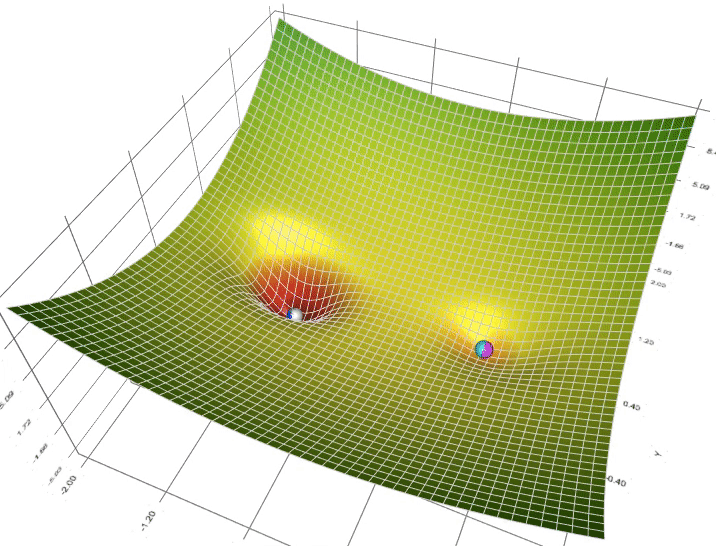

The gif above is taken from an [article by Lili Jiang](https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c).

Luckily, you don't need to implement it yourself since ``scipy.optimize.minimize`` already take care of that. Our focus here is how to turn a physical problem into a mathematical one.

# Simple Example

Let us solve the following

$$
\begin{alignat*}{2}
\underset{x,y \in R}{\operatorname{argmin}} & \quad  & (x-2)^2 + (y-3)^2 + (x-y)^2 \\
\end{alignat*}
$$



In [12]:
from scipy.optimize import minimize

def f(v):
    x, y = v
    return (x-2)**2 + (y-3)**2 + (x-y)**2

result = minimize(f, x0=[1,2])
print(result)
print(result.x)
print(result.fun)

      fun: 0.3333333333337425
 hess_inv: array([[0.33335011, 0.16666677],
       [0.16666677, 0.33333333]])
      jac: array([-1.78068876e-06,  8.79168510e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([2.33333287, 2.66666665])
[2.33333287 2.66666665]
0.3333333333337425


# Least Square Regression


Let's look at the simplest kind of fitting a linear regression to get an idea on how to do a more complicated one.

The idea is to minimize the difference between our guess and actual observation.
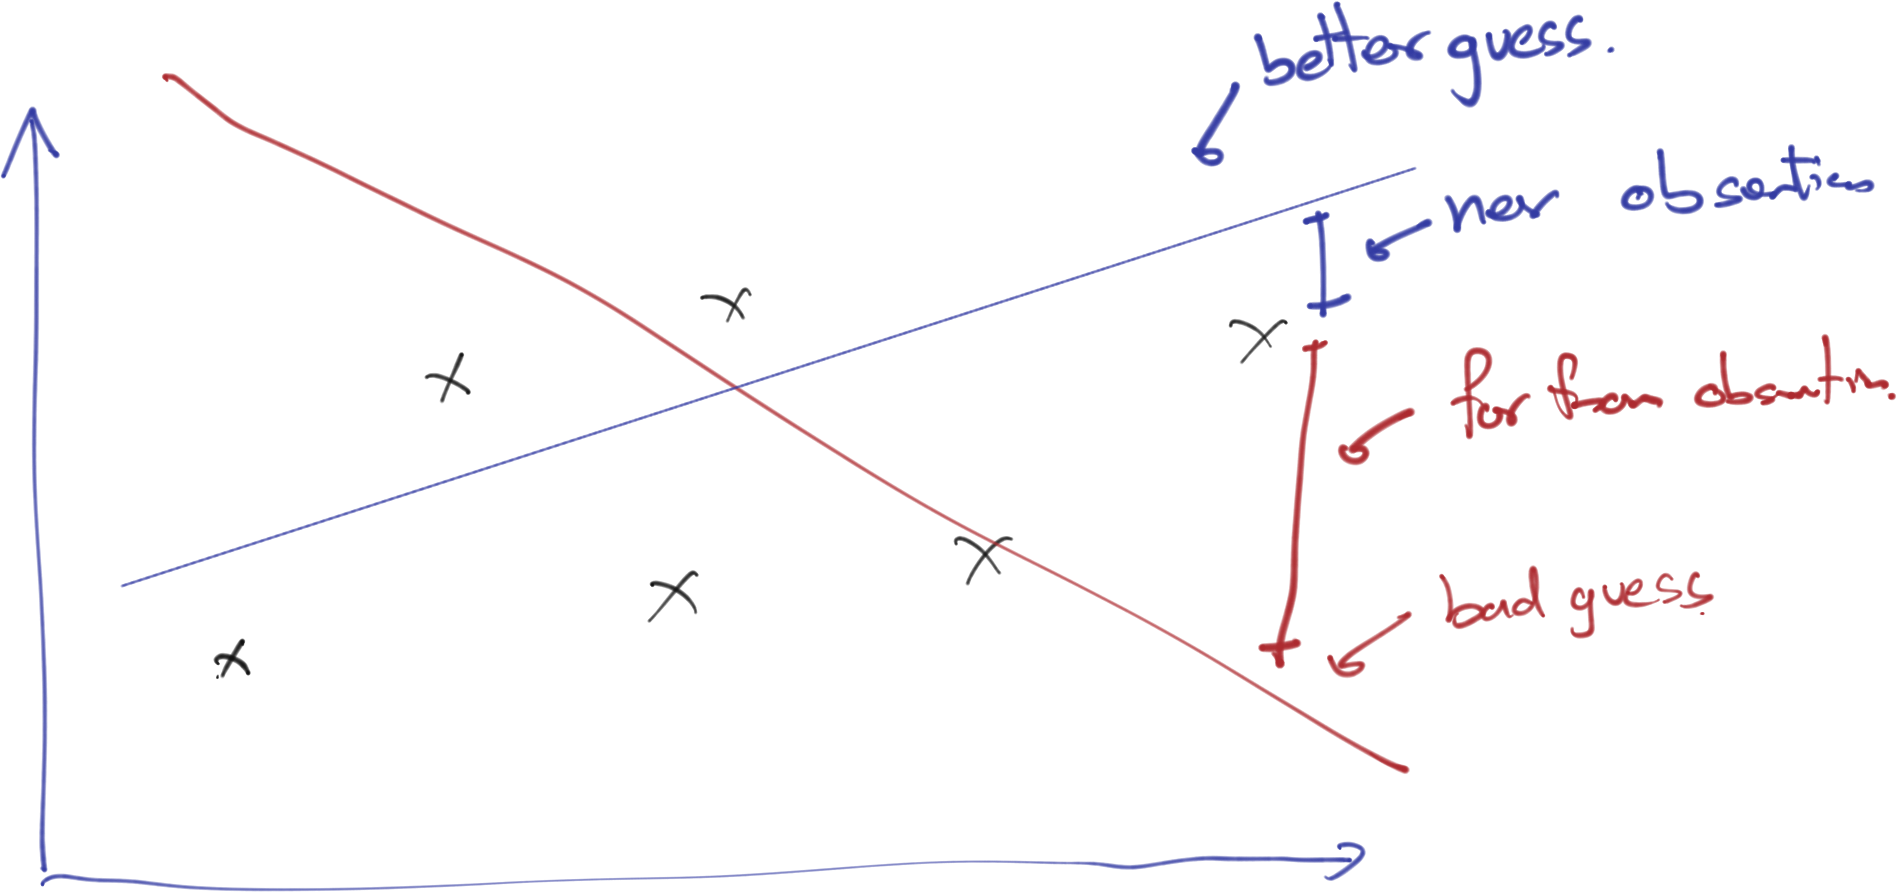

There are many way to measure how far our guess is from the actual observation. One very popular way to do it is
$$
cost(\vec{w}) = \sum_{x_i \in data} (guess(x_i; \vec{w}) - y_i)^2
$$
which is a the sum of squared difference between our guess and y. Then all we need to do is to find $\vec{w}$ that minimize the cost funciton.
$$
\begin{alignat*}{2}
\underset{\vec{w} \in R^n}{\operatorname{argmin}} & \qquad & cost(\vec{w})&\\
\end{alignat*}
$$

## Straight Line

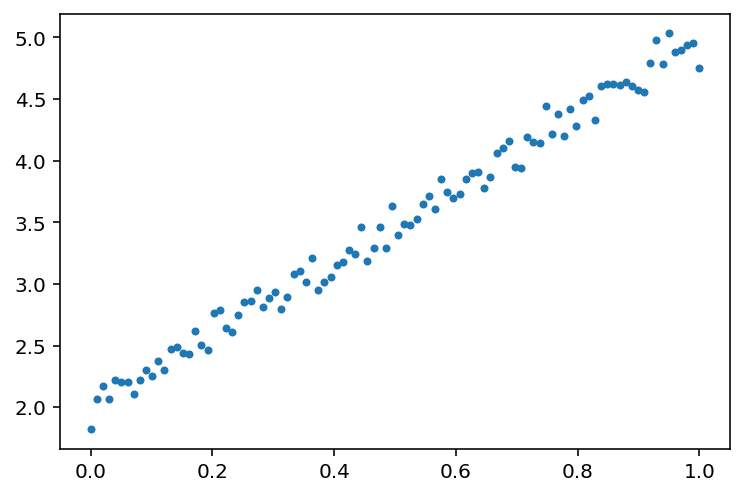

In [24]:
np.random.seed(100)  
xs = np.linspace(0,1, 100)
ys = 3*xs + 2 + np.random.randn(100)*0.1
plt.plot(xs, ys, '.')

2.976425032179236 2.001370898525974


## Fancy Function

Let us suppose we know from physics that this data is from 
$$
    y = A \sin(kx) + c
$$

Let's try to find A, k and c

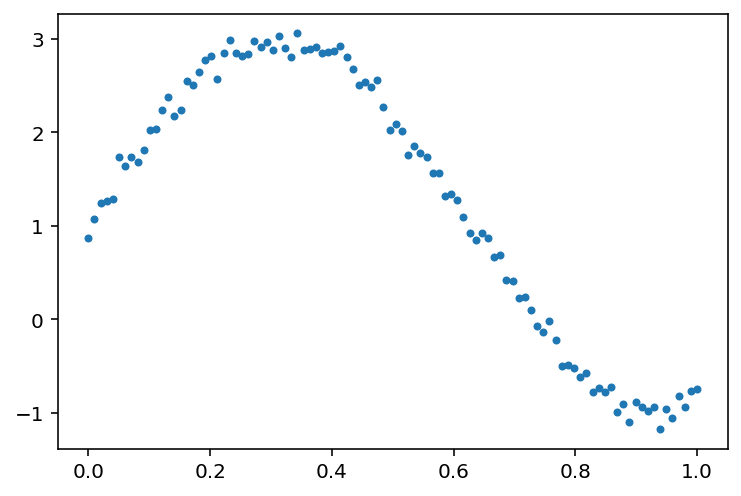

In [30]:
np.random.seed(103)  
xs = np.linspace(0,1, 100)
ys = 2*np.sin(5*xs) + 1 + np.random.randn(100)*0.1
plt.plot(xs, ys, '.')

# Constrained Non Linear Programming.

This can be can be done but again the results varies based on algorithm you use and starting point. Example given here are convex so there is only one true minimum.

## Example 1
Let us suppose that we want to solve

$$
\begin{alignat*}{2}
\underset{x,y\in R}{\operatorname{argmax}} & \qquad & x+y &\\
\text{Subject To:} &  & x^2 + y^2 &\le 1
\end{alignat*}
$$

In [43]:
from scipy.optimize import NonlinearConstraint, LinearConstraint

def f(v):
    x, y = v
    return x + y

def cons(v):
    x,y = v
    return x**2 + y**2

result = minimize(f, 
                  x0=[1,2],
                  constraints = [NonlinearConstraint(cons, -np.inf, 1)]
                 )
result

     fun: -1.4142135692486102
     jac: array([1., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([-0.70710671, -0.70710686])

## Example 2
Linear constraints. There are a lot of optimization that can be done with linear constraints.
$$
\begin{alignat*}{2}
\underset{x,y\in R}{\operatorname{argmax}} & \qquad & x^2 + y^2 &\\
\text{Subject To:} &  & x + y &\le 1 \\
& & x+y &\ge -1
\end{alignat*}
$$

In [47]:
def f(v):
    x, y = v
    return x + y

def cons(v):
    x,y = v
    return x**2 + y**2

result = minimize(f, 
                  x0=[1,2],
                  constraints = [LinearConstraint([[1,1]], -1, 1)]
                 )
result

     fun: -1.0000000000000022
     jac: array([1., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([-1.00000000e+00, -1.11022302e-15])

## Portfolio Optimization: Markowitz
https://en.wikipedia.org/wiki/Modern_portfolio_theory

Consider stocks $i=1,2,3,4,5, \ldots$ 
- each stock has mean returns $\mu_i$
- with covariance matrix $\Sigma_{i,j}$ are the covariance between the return of stock $i$ and $j$. You typically need to estimate this somehow. This is the secret sauce of investment firm they buy and sell for really high amount.

If we invest $x_i$ in to stock $i$, then (read up wiki if you wants more details)

- The mean return of the portfolio is $\sum_i \mu_i x_i$
- The variance of return of the portfolio is $\sum_j \sum_i x_i \Sigma_{i,j} x_j$. This is a good measure of risk. (This is typically written as $x^T \Sigma x$)

In [83]:
n_stock = 50
np.random.seed(100)
mu = np.random.randn(n_stock)
A = np.random.randn(n_stock,n_stock)
Sigma = A@A.T # guarantee positive semi definite

print(mu)
print(Sigma)

[-1.74976547  0.3426804   1.1530358  -0.25243604  0.98132079  0.51421884
  0.22117967 -1.07004333 -0.18949583  0.25500144 -0.45802699  0.43516349
 -0.58359505  0.81684707  0.67272081 -0.10441114 -0.53128038  1.02973269
 -0.43813562 -1.11831825  1.61898166  1.54160517 -0.25187914 -0.84243574
  0.18451869  0.9370822   0.73100034  1.36155613 -0.32623806  0.05567601
  0.22239961 -1.443217   -0.75635231  0.81645401  0.75044476 -0.45594693
  1.18962227 -1.69061683 -1.35639905 -1.23243451 -0.54443916 -0.66817174
  0.00731456 -0.61293874  1.29974807 -1.73309562 -0.9833101   0.35750775
 -1.6135785   1.47071387]
[[ 50.74904898  17.20151604 -17.7002485  ...  15.8004821   -6.76914326
   -7.02052445]
 [ 17.20151604  59.50340393  -6.46343148 ...  10.65836059 -11.69254696
   -9.6913924 ]
 [-17.7002485   -6.46343148  54.21264559 ...   1.57638255   5.37575793
   -7.80174636]
 ...
 [ 15.8004821   10.65836059   1.57638255 ...  45.2127504   -5.27977063
   -9.50689133]
 [ -6.76914326 -11.69254696   5.37575

### Fixed Return Minimum Variance

Once way to select portfolio is to have an expected return in mind then pick the portfolio that give us the least amount of risk/variance.

Let us find the minimum variance portfolio with mean return 0.5.

In [103]:
def mean_return(x):
    return mu@x

def port_variance(x):
    return x.T @ (Sigma @ x)
    


### Efficient Frontier

Given a desired return there is an optimum portfolio/least amount of variance. We can make a plot between the desired return and minimum variance. The line is called the efficient frontier. An investment is efficient if and only if it lies on this line. Otherwise there  is a better portfolio (higher return same variance or same return lower variance). With our optimization solution we actually know what to invest.

If you are more interested, you can read up [Two Funds Theorem/One Fund Theorem](https://en.wikipedia.org/wiki/Mutual_fund_separation_theorem). All the points on the line is a linear combination of two funds.

The general name for this is Pareto Efficiency curve.

### No Short, Minimum Variance

We can also add the fact that shorting stock as an individual is pretty cubersome. By forcing all the $x_i$ to be positive.

### Capital Neutral, Minimum Variance

I personally called this a free lunch returns. Meaning that what if you have 0 capital now. You need to short and buy stock equally. This is done by many firms since it requires very little capital to scale the return, all you need to scale is risk.

What this means mathematically is $\sum_i x_i = 0$